# K-Fold Cross Validation

Please refer to the following documentation from Scikit-Learn to understand the concepts related with K-Fold Cross Validation.

Reference: https://isheunesu48.medium.com/cross-validation-using-k-fold-with-scikit-learn-cfc44bf1ce6#:~:text=Lets%20take%20the%20scenario%20of,serve%20as%20the%20training%20set.

In this lab we are going to implement a SVC model using k-fold cross validation.

The Iris Dataset that avaiable in Scikit-Learn Datasets will be utilized during this task.

Dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris



In [1]:
# Load the necessary libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm



In [2]:
# Load the dataset
iris = datasets.load_iris()


In [ ]:
# Print the data columns

iris.data

In [ ]:
# Print the target column
iris.target


In [ ]:
# Print the model feature names

feature_names = iris.feature_names
feature_names

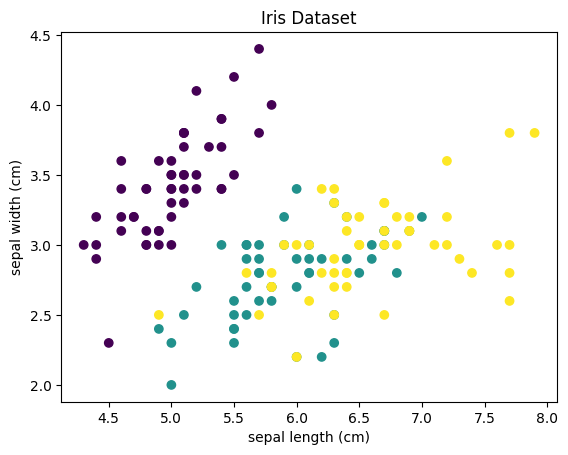

In [9]:
# Select two features from the above features and plot the dataset in the 2D space using matplotlib scatterplots
plt.scatter(iris.data[:,0],iris.data[:,1], c=iris.target)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Iris Dataset");


In [12]:
# Seperate the features and target from the dataset.
# Name them as X and y respectively

x = iris.data
y = iris.target

In [14]:
# Display the shape of the feature set and target

print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [20]:
# Split the data into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [18]:
# Print the train and test set sizes

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [21]:
# Scale the data using scikit-learn standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # fit is because we want to learn mean and std. first they fit for test. and then used to transform
x_test_scaled = scaler.transform(x_test) # already learned mean and std. so just transform

In [22]:
# Define SVC Classifier with default parameters

clf = svm.SVC()

In [25]:
# Estimate the accuracy of the model with k-fold cross validation.
# Use 'cross_val_score' function provided with scikit-learn to obtain the accuracy for each split
# use k = 5

from sklearn.model_selection import cross_val_score

val = cross_val_score(clf, x_train_scaled, y_train, cv = 5) # just y_train do not need to scale
print(val)

[0.95833333 1.         0.83333333 1.         0.95833333]


In [29]:
# Print the calculated scores

# to get average of the 5 splits
print("Accuracy: %0.2f (+/- %0.2f)" % (val.mean(), val.std() * 2))


Accuracy: 0.95 (+/- 0.12)


In [28]:
# Calculate the mean and standard deviation of the accuracy scores obtained via k-fold cross validation
# Use numpy functions
print("avg : ",np.mean(val))
print("std : ",np.std(val))


avg :  0.95
std :  0.06123724356957944


In [30]:
# Fit the model once again with whole training dataset without cross validation.
# Test the model performance with test set

clf.fit(x_train_scaled, y_train)
clf.score(x_test_scaled, y_test)
print("train accuracy : ", clf.score(x_train_scaled, y_train))
print("test accuracy : ", clf.score(x_test_scaled, y_test))

train accuracy :  0.9666666666666667
test accuracy :  1.0


In [ ]:
# 5 or 10 % accuracy deviation of test and train is overfitting... we hvae to consider them also